# 1. Import data and libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [25]:
%matplotlib inline

In [26]:
path = r'/Users/marcela/Desktop/CF/Data Immersion/Achievement 6/Brazilian Ecommerce Analysis'

In [27]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ecommerce_merge.pkl'))

# 2. Preparing the data for clustering

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df.shape

(18079641, 39)

In [30]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [31]:
# Drop duplicates
df.drop_duplicates()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079635,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,83750.0,-25.760605,-49.730156,lapa,PR,14407.0,franca,SP,1.0,debit_card,1.0,86.86,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,health_beauty
18079636,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018

In [32]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18079641 entries, 0 to 18079640
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   order_item_id                  float64
 9   product_id                     object 
 10  seller_id                      object 
 11  shipping_limit_date            object 
 12  price                          float64
 13  freight_value                  float64
 14  customer_unique_id             object 
 15  customer_zip_code_prefix       int64  
 16  customer_city                  object 
 17  customer_state                 object 
 18  

In [34]:
df.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,1.795551e+07,1.795551e+07,1.795551e+07,1.807964e+07,1.807932e+07,1.807932e+07,1.807932e+07,1.795551e+07,1.807861e+07,1.807861e+07,1.807861e+07,1.769603e+07,1.769603e+07,1.769603e+07,1.795183e+07,1.795183e+07,1.795183e+07,1.795183e+07
mean,1.205339e+00,1.215850e+02,1.961627e+01,3.269805e+04,3.269750e+04,-2.197018e+01,-4.594531e+01,2.510738e+04,1.093270e+00,2.933083e+00,1.745977e+02,4.865285e+01,7.799335e+02,2.194911e+00,2.152179e+03,3.047683e+01,1.671088e+01,2.314499e+01
std,7.000264e-01,1.865799e+02,1.497672e+01,2.696070e+04,2.696050e+04,4.274945e+00,3.555982e+00,2.800423e+04,6.878915e-01,2.794927e+00,2.678778e+02,1.007660e+01,6.474214e+02,1.719008e+00,3.842051e+03,1.643536e+01,1.349291e+01,1.177957e+01
min,1.000000e+00,8.500000e-01,0.000000e+00,1.003000e+03,1.003000e+03,-3.660537e+01,-1.014668e+02,1.001000e+03,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00
25%,1.000000e+00,3.990000e+01,1.347000e+01,1.314000e+04,1.314000e+04,-2.357605e+01,-4.761348e+01,6.871000e+03,1.000000e+00,1.000000e+00,6.171000e+01,4.200000e+01,3.410000e+02,1.000000e+00,3.000000e+02,1.800000e+01,8.000000e+00,1.500000e+01
50%,1.000000e+00,7.499000e+01,1.625000e+01,2.359500e+04,2.359500e+04,-2.291110e+01,-4.645748e+01,1.392000e+04,1.000000e+00,1.000000e+00,1.100000e+02,5.100000e+01,5.970000e+02,1.000000e+00,7.000000e+02,2.500000e+01,1.300000e+01,2.000000e+01
75%,1.000000e+00,1.350000e+02,2.035000e+01,3.840000e+04,3.840000e+04,-2.044162e+01,-4.335169e+01,3.027000e+04,1.000000e+00,4.000000e+00,1.917300e+02,5.700000e+01,9.780000e+02,3.000000e+00,1.825000e+03,3.800000e+01,2.000000e+01,3.000000e+01
max,2.100000e+01,6.735000e+03,4.096800e+02,9.999000e+04,9.999000e+04,4.506593e+01,1.382021e+01,9.973000e+04,2.900000e+01,2.400000e+01,1.366408e+04,7.600000e+01,3.992000e+03,2.000000e+01,4.042500e+04,1.050000e+02,1.050000e+02,1.180000e+02


In [35]:
# Filling missing values with median for numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

In [36]:
# Keep only numerical columns
df = df.select_dtypes(include=[np.number])

In [37]:
df.head()

,order_item_id,price,freight_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,2.0,1.0,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0


## Standardizing the data

In [38]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for further analysis
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# 3. The Elbow Technique

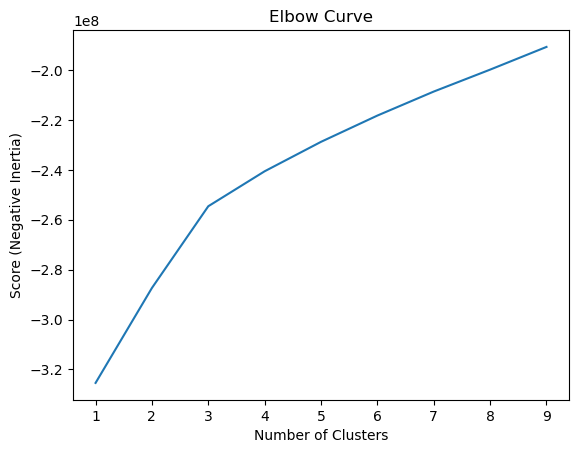

In [39]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=42) for i in num_cl]  
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]  

# Plot the elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score (Negative Inertia)')
pl.title('Elbow Curve')
pl.show()

# 4. Optimar Number of Clusters

## After analyzing the Elbow Curve, I choose to use 3 clusters for the following reasons:

- **Elbow Point**: There is a clear "elbow" in the curve at k=3, indicating a significant reduction in the rate at which inertia decreases as the number of clusters increases.
- **Diminishing Returns**: Beyond 3 clusters, the inertia decreases at a much slower rate, suggesting that the additional clusters are not capturing substantial new information and thus, may not be necessary.
- **Balance**: With 3 clusters, a balance is struck between minimizing within-cluster variance (inertia) and maintaining the simplicity of the model.

# 5. k-means algorithm

In [42]:
# Create the k-means object
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

In [43]:
# Fit the k-means object to the data and predict the cluster labels
cluster_labels = kmeans.fit_predict(df_scaled)

# 6. Attach a new column

In [44]:
# Attach a new column to the original dataframe with the cluster labels
df['clusters'] = cluster_labels

In [45]:
# Display the first few rows of the dataframe with the cluster labels
df.head()

,order_item_id,price,freight_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,clusters
0,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
1,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
2,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,2.0,1.0,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
3,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
4,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1


In [58]:
df['clusters'].value_counts()

clusters
1    13529151
2     2780105
0     1770385
Name: count, dtype: int64

# 7. Create a few different visualizations

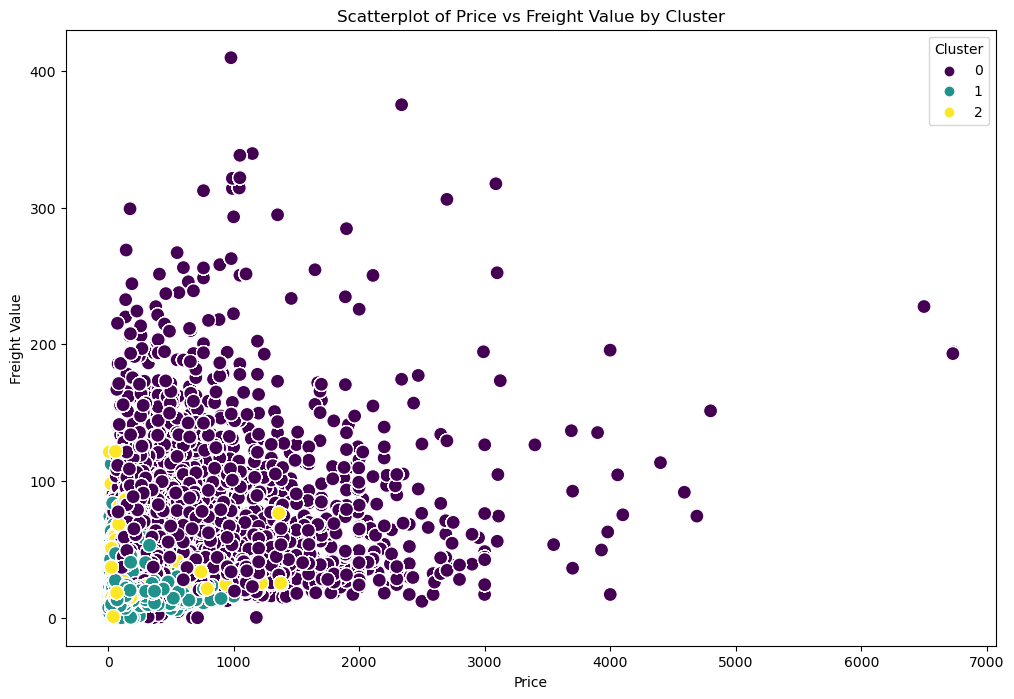

In [50]:
# Price vs Freight Value by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price', y='freight_value', hue='clusters', palette='viridis', s=100)
plt.title('Scatterplot of Price vs Freight Value by Cluster')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.legend(title='Cluster')
plt.show()

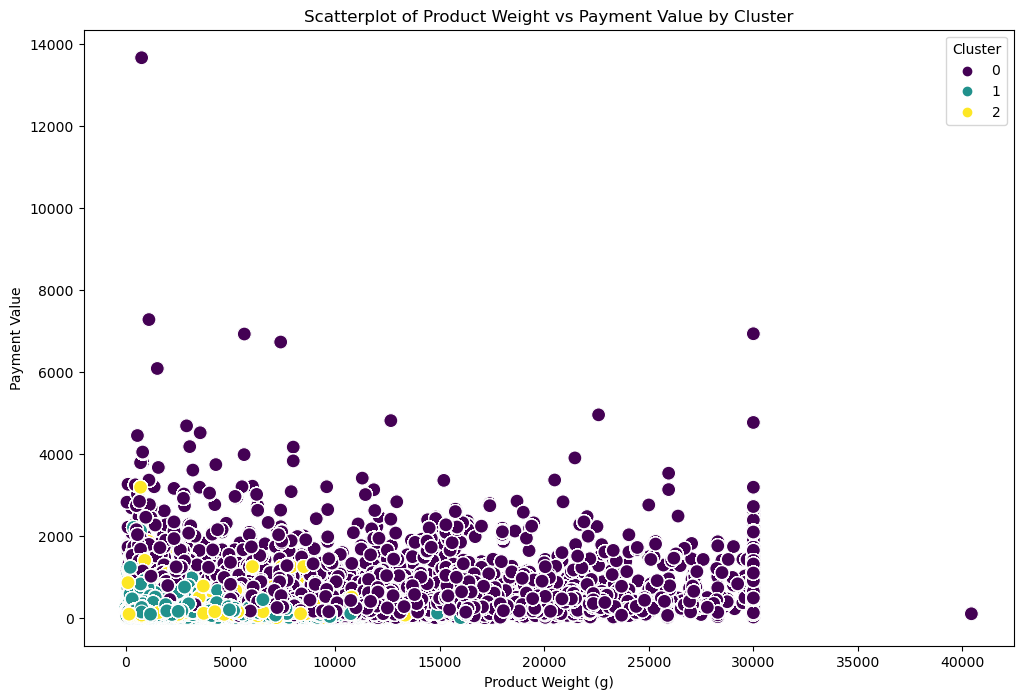

In [51]:
# Product Weight vs Payment Value by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='product_weight_g', y='payment_value', hue='clusters', palette='viridis', s=100)
plt.title('Scatterplot of Product Weight vs Payment Value by Cluster')
plt.xlabel('Product Weight (g)')
plt.ylabel('Payment Value')
plt.legend(title='Cluster')
plt.show()

# 8. Discuss how and why the clusters make sense

#### Price vs. Freight Value
- **Cluster 0**: Represents lower to mid-range prices and freight values, likely indicating standard products with regular shipping costs.
- **Cluster 1**: Shows higher freight values which could be associated with bulkier items or those requiring special shipping, not necessarily related to the price.
- **Cluster 2**: Includes high-priced items, suggesting a premium segment with variable shipping costs.

#### Product Weight vs. Payment Value
- **Cluster 0**: Features a variety of product weights but generally lower payment values, which may correspond to common, lighter, and less expensive items.
- **Cluster 1**: Captures items with higher payment values across a broad weight range, potentially indicating luxury or high-value products.
- **Cluster 2**: Similar to Cluster 0 in payment value, but less frequent, possibly a niche segment.

# 9. Calculate the descriptive statistics for the clusters using the groupby() function

In [60]:
df.loc[df['clusters'] == 2, 'cluster'] = 'yellow'
df.loc[df['clusters'] == 1, 'cluster'] = 'green'
df.loc[df['clusters'] == 0, 'cluster'] = 'purple'

In [61]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'freight_value':['mean', 'median'], 
                         'product_weight_g':['mean', 'median'],
                          'payment_value':['mean', 'median']})

price         freight_value        product_weight_g          \
               mean  median          mean median             mean  median   
cluster                                                                     
green     91.971737   66.99     16.175529  15.31      1171.526133   600.0   
purple   373.590500  204.00     45.737888  36.85     10635.412291  9750.0   
yellow   103.136710   70.00     19.575664  17.66      1455.518246   650.0   

        payment_value          
                 mean  median  
cluster                        
green      132.580679   98.22  
purple     520.643561  305.34  
yellow     158.682146  113.03

# 10. Propose what these results could be useful for in future steps of an analytics pipeline

**Green Cluster:**

Targeting: Focus on cost-effective products and shipping for price-sensitive customers.

Promotions: Tailor promotions to encourage higher volume sales at lower price points.

**Purple Cluster:**

Premium Services: Offer premium services or products, as this group seems less price-sensitive.

Logistics: Manage logistics for heavier items, potentially improving bulk shipping.

**Yellow Cluster:**

Customer Experience: Enhance customer satisfaction with moderate shipping costs and product range.

Upselling Opportunities: Identify opportunities to increase the average payment value within this segment.